In [1]:
# Import das Bibliotecas:
import numpy
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
a = sys.path.append('../modules/') # endereco das funcoes implementadas por voce!

In [2]:
import prism, noise, plot_3D, auxiliars, salve_doc

In [3]:
nx = 100 # n de observacoes na direcao x
ny = 100 # n de observacoes na direcao y
size = (nx, ny)

xmin = -10000.0 # metros
xmax = +10000.0 # metros
ymin = -10000.0 # metros
ymax = +10000.0 # metros
z    = -100.0  # altura de voo, em metros

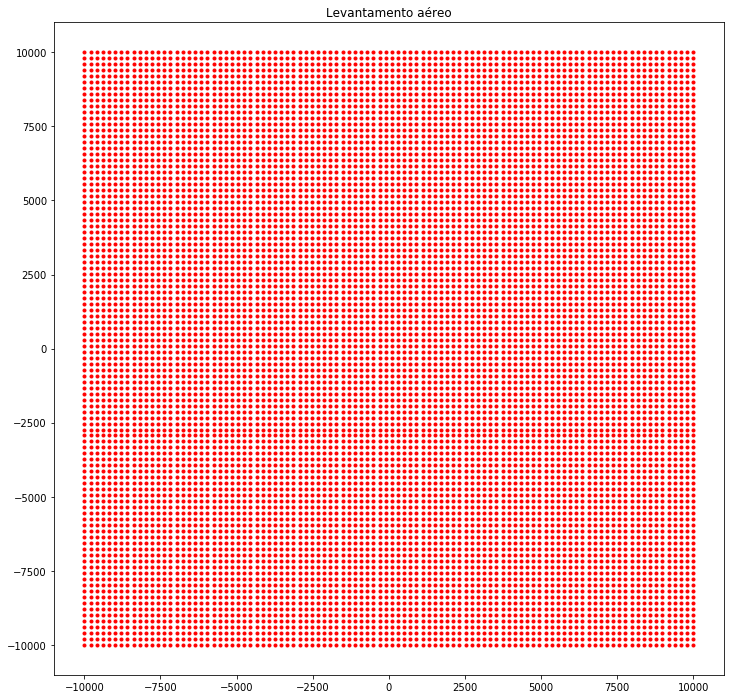

In [4]:
dicionario = {'nx': nx,
                  'ny': ny,
                  'xmin': xmin,
                  'xmax': xmax,
                  'ymin': ymin,
                  'ymax': ymax,
                  'z': z,
                  'color': '.r'}

x, y, X, Y = plot_3D.create_aquisicao(dicionario)

In [5]:
# coordenadas dos vertices (corners) do prisma, em metros:
x1,x2  = (-2000.0, 2000.0) 
y1,y2  = (-2500.0, 2500.0)
z1,z2  = (1000.0,1500.0)   # z eh positivo para baixo!
deltaz = 100.0
deltay = 4000.0
incl = 'positivo'

In [6]:
dic = {'n': 3,
       'x': [x1, x2],
       'y': [y1, y2],
       'z': [z1, z2],
       'deltay': deltay,
       'deltaz': deltaz,
       'incl': 'positivo'}

pointx, pointy, pointz = plot_3D.creat_point(dic)

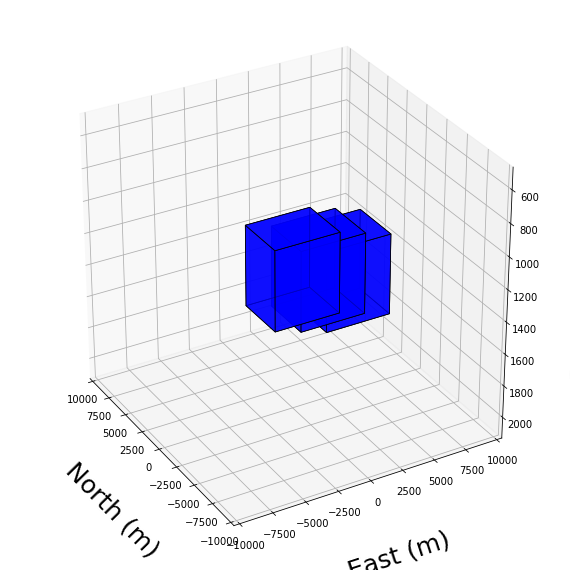

In [7]:
#%matplotlib notebook
dic1 = {'x': [pointx[0], pointx[1]],
        'y': [pointy[0], pointy[1]],
        'z': [pointz[0], pointz[1]]}

dic2 = {'x': [pointx[2], pointx[3]],
        'y': [pointy[2], pointy[3]],
        'z': [pointz[2], pointz[3]]}

dic3 = {'x': [pointx[4], pointx[5]],
        'y': [pointy[4], pointy[5]],
        'z': [pointz[4], pointz[5]]}
#----------------------------------------------------------------------------------------------------#
vert1 =  plot_3D.vert_point(dic1)
vert2 =  plot_3D.vert_point(dic2)
vert3 =  plot_3D.vert_point(dic3)
#----------------------------------------------------------------------------------------------------#
color = 'b'
size = [8, 8]
view = [210, 30]
#----------------------------------------------------------------------------------------------------#
prism_1 = plot_3D.plot_prism(vert1, color)
prism_2 = plot_3D.plot_prism(vert2, color)
prism_3 = plot_3D.plot_prism(vert3, color)
#----------------------------------------------------------------------------------------------------#
prisma = {'n': 3,
         'prisma': [prism_1, prism_2,prism_3]}

plot_3D.plot_obs_3d(prisma, size, view, x, y, pointz)

In [8]:
I = -30.0    # inclinacao do campo principal em graus
D = -23.0      # declinacao do campo principal em graus
Fi = 40000.0 # Intensidade do campo principal (nT)

# Campo principal variando com as posicao F(X,Y):
F = Fi + 0.013*X + 0.08*Y # nT

# Calculo das componentes cartesianas do versor F:

# conversao de graus para radiandos:
incl = numpy.deg2rad(I)
decl = numpy.deg2rad(D)
#-----------------------------------
Fx = numpy.cos(incl)*numpy.cos(decl)
Fy = numpy.cos(incl)*numpy.sin(decl)
Fz = numpy.sin(incl)

In [9]:
# Propriedades magneticas da fonte crustal:
inc = I # magnetizacao puramente induzida
dec = -10.0 
Mi  = 10.0 # intensidade da magnetizacao em A/m

# conversao de graus para radianos:
inc_rad = numpy.deg2rad(inc)
dec_rad = numpy.deg2rad(dec)

# versor magnetizacao da fonte crustal modelada:
mx = numpy.cos(inc_rad)*numpy.cos(dec_rad)
my = numpy.cos(inc_rad)*numpy.sin(dec_rad)
mz = numpy.sin(inc_rad)

fonte_crustal_mag = [x1,x2,y1,y2,z1,z2,Mi]

In [10]:
# calculando as componentes cartesianas do campo B
bx = prism.prism_bx(X, Y, z, fonte_crustal_mag, I,D, inc, dec) 
by = prism.prism_by(X, Y, z, fonte_crustal_mag, I,D, inc, dec)  
bz = prism.prism_bz(X, Y, z, fonte_crustal_mag, I,D, inc, dec)

# Etapa 4: Calculo do Campo total:
CT =  numpy.sqrt((F*Fx + bx)**2 + (F*Fy + by)**2 + (F*Fz + bz)**2)
# Anomalia de Campo Total:
ACT = CT - F
mi = 0.0
sigma = 0.05
ACTn = auxiliars.noise_normal_dist(ACT, mi, sigma)

In [11]:
data_e_hora_atuais = datetime.now()
data_e_hora = data_e_hora_atuais.strftime('%d_%m_%Y_%H_%M')

dicionario = {'Data da Modelagem': data_e_hora,
              'Tipo de Modelagem': 'Modelagem de prisma',
              'números de corpos': 3,
              'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [x1, x2, y1, y2, z1, z2],
              'inclinação': 'positivo',
              'Informação da fonte (Mag, Incl, Decl)': [Mi, inc, dec],
              'Informação regional (Camp.Geomag, Incl, Decl)': [Fi, I, D]}

print(dicionario)

{'Data da Modelagem': '10_06_2020_10_50', 'Tipo de Modelagem': 'Modelagem de prisma', 'números de corpos': 3, 'Coordenadas do prisma 1 (x1, x2, y1, y2, z1, z2)': [-2000.0, 2000.0, -2500.0, 2500.0, 1000.0, 1500.0], 'inclinação': 'positivo', 'Informação da fonte (Mag, Incl, Decl)': [10.0, -30.0, -10.0], 'Informação regional (Camp.Geomag, Incl, Decl)': [40000.0, -30.0, -23.0]}


In [ ]:
#salve_doc.create_diretorio(dicionario, ACTn)

In [12]:
dici1 = {'nx': nx,
         'ny': ny,
         'X': X,
         'Y': Y,
         'ACTn': ACTn
                  }

In [13]:
Data_f = salve_doc.reshape_matrix(dici1)

In [14]:
Data_f

,North (m),East (m),Anomalia Magnética (nT)
0,-10000.000000,-10000.0,-0.172301
1,-9797.979798,-10000.0,-0.218870
2,-9595.959596,-10000.0,-0.241679
3,-9393.939394,-10000.0,-0.209184
4,-9191.919192,-10000.0,-0.215590
5,-8989.898990,-10000.0,-0.287502
6,-8787.878788,-10000.0,-0.320968
7,-8585.858586,-10000.0,-0.312164
8,-8383.838384,-10000.0,-0.374132
9,-8181.818182,-10000.0,-0.317282
